<a href="https://colab.research.google.com/github/Keganwealths/1stSuperstore/blob/main/Fine_tuning_Hugging_face_text_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis with Hugging Face

Hugging Face is an open-source and platform provider of machine learning technologies. You can use install their package to access some interesting pre-built models to use them directly or to fine-tune (retrain it on your dataset leveraging the prior knowledge coming with the first training), then host your trained models on the platform, so that you may use them later on other devices and apps.

Please, [go to the website and sign-in](https://huggingface.co/) to access all the features of the platform.

[Read more about Text classification with Hugging Face](https://huggingface.co/tasks/text-classification)

The Hugging face models are Deep Learning based, so will need a lot of computational GPU power to train them. Please use [Colab](https://colab.research.google.com/) to do it, or your other GPU cloud provider, or a local machine having NVIDIA GPU.

## Application of Hugging Face Text classification model Fune-tuning

Find below a simple example, with just `3 epochs of fine-tuning`.

Read more about the fine-tuning concept : [here](https://deeplizard.com/learn/video/5T-iXNNiwIs#:~:text=Fine%2Dtuning%20is%20a%20way,perform%20a%20second%20similar%20task.)

In [1]:
!pip install datasets
!pip install transformers
!pip install torch
!pip install tensorflow
!pip install transformers[torch]
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 20.3 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.18.0
    Uninstalling huggingface-hub-0.18.0:
      Successfully uninstalled huggingface-hub-0.18.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 5.3 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import re
import string


In [ ]:
# Disabe W&B
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
# Load the dataset and display some values
df = pd.read_csv(r'/content/drive/MyDrive/Career_Accelerator_P5-NLP-master/Career_Accelerator_P5-NLP-master/zindi_challenge/data/Train.csv')

# A way to eliminate rows containing NaN values
df = df[~df.isna().any(axis=1)]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


I manually split the training set to have a training subset ( a dataset the model will learn on), and an evaluation subset ( a dataset the model with use to compute metric scores to help use to avoid some training problems like [the overfitting](https://www.ibm.com/cloud/learn/overfitting) one ).

There are multiple ways to do split the dataset. You'll see two commented line showing you another one.

In [ ]:
# Split the train data => {train, eval}
train, eval = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

In [ ]:
df.head()

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0


In [ ]:
df.shape

(9999, 4)

In [ ]:
df.isna().sum()

tweet_id     0
safe_text    0
label        0
agreement    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   9999 non-null   object 
 1   safe_text  9999 non-null   object 
 2   label      9999 non-null   float64
 3   agreement  9999 non-null   float64
dtypes: float64(2), object(2)
memory usage: 390.6+ KB


In [ ]:
duplicates = df.duplicated().sum()
duplicates


0

In [ ]:
df.describe()

,label,agreement
count,9999.00000,9999.000000
mean,0.30153,0.854252
std,0.64674,0.180707
min,-1.00000,0.333333
25%,0.00000,0.666667
50%,0.00000,1.000000
75%,1.00000,1.000000
max,1.00000,1.000000


**Data Overview:**

What is the size of your dataset (number of samples)?
What is the distribution of sentiment labels (positive, negative, neutral, etc.)?
Are there any missing values in the text or sentiment labels?
**Text Data:**

What is the average length of the text data (e.g., number of words or characters)?
Are there any special characters, symbols, or emojis in the text that need special handling?
Is the text data in a consistent format, or does it require preprocessing (e.g., lowercasing, stemming, lemmatization)?
Are there any stop words that should be removed, or important domain-specific terms to be considered?
Class Distribution:

How balanced or imbalanced is the distribution of sentiment classes?
Is class imbalance an issue that needs to be addressed during model training?
Text Preprocessing:

Have you removed any irrelevant information, such as URLs or user handles in the text?
Have you cleaned the text data of any HTML tags, punctuation, or noise?
N-grams and Vocabulary:

What are the most common n-grams (e.g., unigrams, bigrams) in the text data?
Is there a need to limit the vocabulary size or apply feature selection methods to reduce dimensionality?
Word Clouds:

What are the most frequent words associated with each sentiment class?
Can you visualize these words using word clouds?
Text Length and Sentiment:

Is there a relationship between text length and sentiment (e.g., longer texts tend to be more negative or positive)?
Can you create histograms or box plots to visualize this?
**Time Trends:**

If applicable, is there a time component to your data?
Are there any trends in sentiment over time that may be relevant to your analysis?
Biases and Anomalies:

Are there any biases or anomalies in your data that might affect sentiment analysis (e.g., a specific source or user consistently posting positive or negative sentiment)?
Feature Engineering:

Can you extract additional features like sentiment scores from the text (e.g., sentiment lexicon-based features)?
Can you engineer features related to the length or structure of the text?


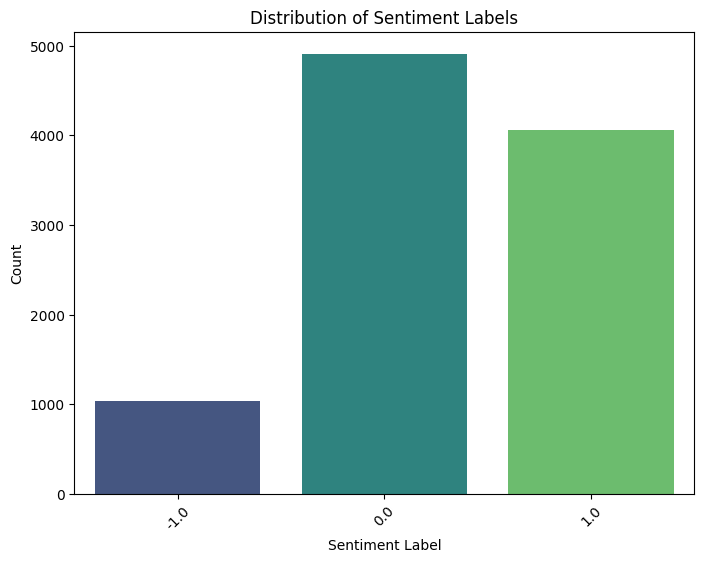

In [ ]:
sentiment_counts = df['label'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Distribution of Sentiment Labels")
plt.xlabel("Sentiment Label")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
#What is the average length of the text data
average_text_length = df['safe_text'].apply(len).mean()

print(f"The average length of the text data is {average_text_length:.2f} characters.")

The average length of the text data is 99.92 characters.


In [ ]:
def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove user handles (Twitter handles, for example)
    text = re.sub(r'@[\w]+', '', text)

    # Remove punctuation and special characters
    text = ''.join([char for char in text if char not in string.punctuation])

    # Remove extra whitespaces
    text = ' '.join(text.split())

    return text

# Apply the cleaning function to the 'safe_text' column
df['cleaned_text'] = df['safe_text'].apply(clean_text)


<ipython-input-55-7a5e7e3fbc49>:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


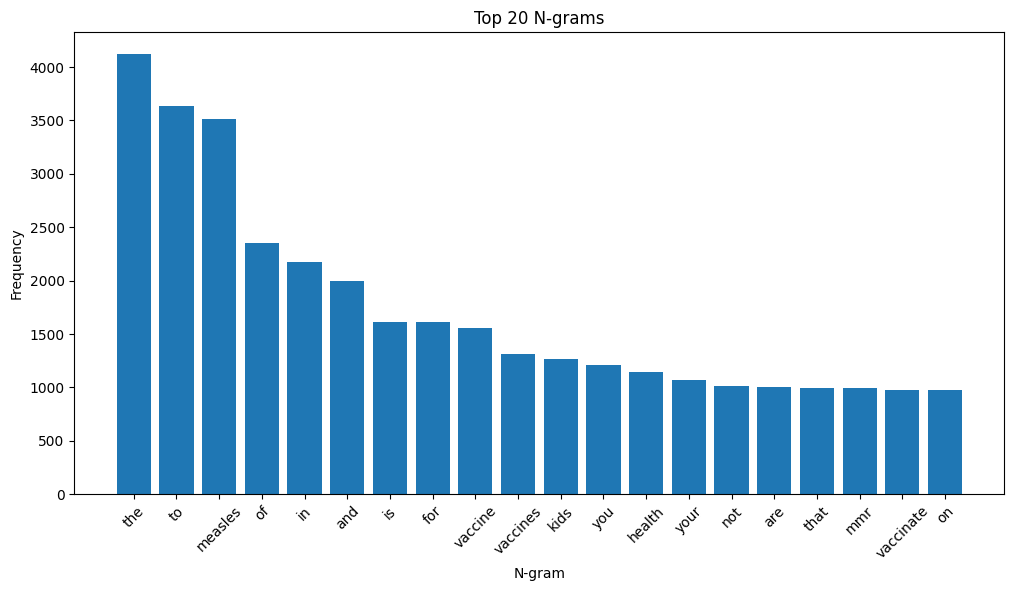

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Create a CountVectorizer to generate n-grams
count_vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=100)

# Fit and transform the cleaned text to generate n-grams
ngrams = count_vectorizer.fit_transform(df['cleaned_text'])

# Get the vocabulary of n-grams
vocabulary = count_vectorizer.get_feature_names_out()

# Count the frequency of each n-gram
ngram_frequencies = ngrams.sum(axis=0)

# Create a DataFrame to analyze the vocabulary
ngram_df = pd.DataFrame({'Ngram': vocabulary, 'Frequency': ngram_frequencies.A1})

# Sort n-grams by frequency
ngram_df = ngram_df.sort_values(by='Frequency', ascending=False)

# Visualize the most frequent n-grams
plt.figure(figsize=(12, 6))
plt.bar(ngram_df['Ngram'][:20], ngram_df['Frequency'][:20])
plt.xticks(rotation=45)
plt.xlabel('N-gram')
plt.ylabel('Frequency')
plt.title('Top 20 N-grams')
plt.show()


In [ ]:
# Save splitted subsets
train.to_csv("/content/drive/MyDrive/Career_Accelerator_P5-NLP-master/Career_Accelerator_P5-NLP-master/zindi_challenge/data/train_subset.csv", index=False)
eval.to_csv("/content/drive/MyDrive/Career_Accelerator_P5-NLP-master/Career_Accelerator_P5-NLP-master/zindi_challenge/data/eval_subset.csv", index=False)

In [ ]:
print(f"new dataframe shapes: train is {train.shape}, eval is {eval.shape}")

new dataframe shapes: train is (7999, 4), eval is (2000, 4)


In [ ]:
dataset = load_dataset('csv',
                        data_files={'train': '/content/drive/MyDrive/Career_Accelerator_P5-NLP-master/Career_Accelerator_P5-NLP-master/zindi_challenge/data/train_subset.csv',
                        'eval': '/content/drive/MyDrive/Career_Accelerator_P5-NLP-master/Career_Accelerator_P5-NLP-master/zindi_challenge/data/eval_subset.csv'}, encoding = "ISO-8859-1")


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating eval split: 0 examples [00:00, ? examples/s]

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

In [ ]:
def transform_labels(label):

    label = label['label']
    num = 0
    if label == -1: #'Negative'
        num = 0
    elif label == 0: #'Neutral'
        num = 1
    elif label == 1: #'Positive'
        num = 2

    return {'labels': num}

def tokenize_data(example):
    return tokenizer(example['safe_text'], padding='max_length')

# Change the tweets to tokens that the models can exploit
dataset = dataset.map(tokenize_data, batched=True)

# Transform	labels and remove the useless columns
remove_columns = ['tweet_id', 'label', 'safe_text', 'agreement']
dataset = dataset.map(transform_labels, remove_columns=remove_columns)

Map:   0%|          | 0/7999 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/7999 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 7999
    })
    eval: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 2000
    })
})

In [ ]:
# dataset['train']

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="test_trainer",  # Directory for saving training outputs
    per_device_train_batch_size=8,  # Batch size for training
    per_device_eval_batch_size=8,  # Batch size for evaluation
    evaluation_strategy="steps",  # Evaluation strategy
    eval_steps=500,  # Evaluate every 500 steps
    num_train_epochs=3000,  # Total number of training epochs
    load_best_model_at_end=True,  # Load the best model at the end of training
    save_total_limit=5,  # Limit the number of saved checkpoints
    logging_dir="./logs",  # Directory for saving logs
    logging_steps=100,  # Log every 100 steps
    save_steps=500,  # Save model every 500 steps
    save_strategy="steps",  # Save model checkpoints based on steps
)


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
from transformers import AutoModelForSequenceClassification

# Loading a pretrain model while specifying the number of labels in our dataset for fine-tuning
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
train_dataset = dataset['train'].shuffle(seed=10) #.select(range(40000)) # to select a part
eval_dataset = dataset['eval'].shuffle(seed=10)

## other way to split the train set ... in the range you must use:
# # int(num_rows*.8 ) for [0 - 80%] and  int(num_rows*.8 ),num_rows for the 20% ([80 - 100%])
# train_dataset = dataset['train'].shuffle(seed=10).select(range(40000))
# eval_dataset = dataset['train'].shuffle(seed=10).select(range(40000, 41000))

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model, args=training_args, train_dataset=train_dataset, eval_dataset=eval_dataset
)

In [ ]:
# Launch the learning process: training
trainer.train()

Step,Training Loss,Validation Loss


Step,Training Loss,Validation Loss


Don't worry the above issue, it is a `KeyboardInterrupt` that means I stopped the training to avoid taking a long time to finish.

In [ ]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

<ipython-input-27-75db7450f822>:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

NameError: ignored

In [ ]:
# Launch the final evaluation
trainer.evaluate()

NameError: ignored

In [ ]:
model_name=''
model= AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer=AutoTokenizer.from_pretrained(model_name)

Some checkpoints of the model are automatically saved locally in `test_trainer/` during the training.

You may also upload the model on the Hugging Face Platform... [Read more](https://huggingface.co/docs/hub/models-uploading)

This notebook is inspired by an article: [Fine-Tuning Bert for Tweets Classification ft. Hugging Face](https://medium.com/mlearning-ai/fine-tuning-bert-for-tweets-classification-ft-hugging-face-8afebadd5dbf)

Do not hesitaite to read more and to ask questions, the Learning is a lifelong activity.